# Trabajo Semanal N°1 : 'Sintesis de señales'
### Alumno: Magdalena Guida

### APS - 2do cuatrimestre 2025

Este trabajo tiene como objetivo explorar la sintesis y el analisis de señales temporales utilizando las herramientas que ofrecen las librerias de Python, como NumPy, SciPy y Matplotlib. A traves de estas herramientas, se diseñaron y manipularon distintas señales, entre ellas sinusoidales, cuadradas y pulsos, con el fin de estudiar sus características fundamentales. Para cada señal generada se evaluaron propiedades clave como la frecuencia, fase, amplitud, potencia, modulacion, ortogonalidad, autocorrelacion y correlacion cruzada. Estas metricas permiten no solo describir cuantitativamente cada señal, sino tambien establecer relaciones entre ellas, identificar similitudes estructurales y analizar su interaccion energetica.

En primer lugar se diseñaron y graficaron señales senoidales, con las siguientes particularidades: 
- Frecuencia= $2kHz$, amplitud= $A$ 
- Frecuencia= $2kHz$, desfasaje= $\frac{\pi}{2}$, amplitud= $3*A$
- Misma señal, pero modulada en amplitud por una senoidal de frecuencia= $1kHz$
- Frecuencia= $2kHz$, amplitud= $A$, recortada al $75$% 

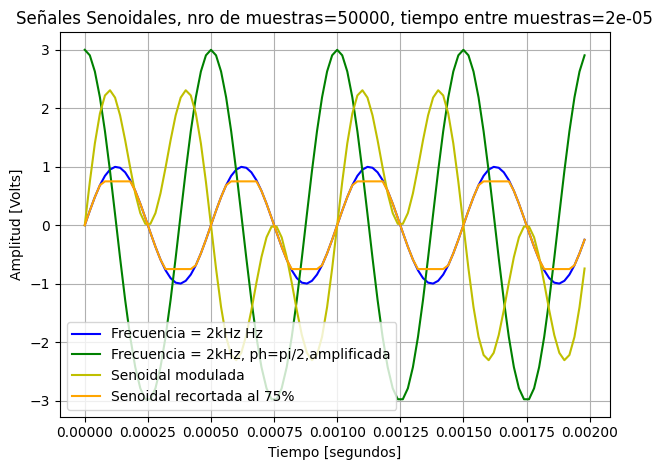

In [8]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import wmi

fs =50000     # Frecuencia de muestreo
N = 50000     # Número de muestras
ts = 1 / fs  # Tiempo entre muestras correlativas
# tiempo total de muestreo = N*ts = N * 1/fs = 1s
df = fs/N  # Resolución espectral  en Hz 
dc = 0       #Desplazamiento vertical [V]  
ph = 0       #FASE = Desplazamiento horizontal [rad]


# Definicion funciónes seno
def func_sen(Vmax=1, dc=dc, ff=1, ph=ph, nn=N, fs=fs):
    tt = np.arange(0, nn / fs, 1 / fs).reshape(nn,1)
    xx = Vmax * np.sin(2 * np.pi * ff * tt + ph).reshape(nn,1) + dc
    return tt, xx
    
tt1, xx1 = func_sen(ff=2000, fs=fs)                    # senoidal 'base'
tt2, xx2 = func_sen( ff= 2000, ph= np.pi/2, Vmax=3)    # amplificada  y defazada
tt3, xx3 = func_sen(ff=1000, ph= np.pi/2, Vmax=3)      # senoidal con mitad de f 
xx4 = xx3 * xx1                                        # modulada 
xx5 = np.clip(xx1,a_min = -.75, a_max= 0.75)           # funcion de amp=1 reducida a su 75%    
# # como la amplitud es 1, el 75% va a ser 0.75

recorte = int(0.002 * fs)      # 2 ms
recorte2 = int(0.03 * fs )
tt1 = tt1[:recorte]
xx1 = xx1[:recorte]
tt2 = tt2[:recorte]
xx2 = xx2[:recorte]
tt4 = tt1[:recorte]
xx4 = xx4[:recorte]
xx5 = xx5[:recorte]

# GRAFICO 
# Caracteristicas del Grafico
plt.figure()
plt.title(f"Señales Senoidales, nro de muestras={N}, tiempo entre muestras={ts}")
plt.plot(tt1, xx1, label="Frecuencia = 2kHz Hz", color = 'b')
plt.plot(tt2, xx2, label="Frecuencia = 2kHz, ph=pi/2,amplificada", color= 'g')
plt.plot(tt1, xx4, label="Senoidal modulada", color = 'y')
plt.plot(tt1, xx5, label="Senoidal recortada al 75%", color='orange')
plt.legend(loc = 'lower left')
plt.xlabel("Tiempo [segundos]")
plt.ylabel("Amplitud [Volts]")
plt.grid(True)
plt.tight_layout()
plt.show()

Luego se verifico la ortogonalidad de cada señal respecto a la primera diseñada. Para ello, se comprobo que la integral del producto entre ambas funciones, evaluada sobre un periodo completo, fuera igual a cero. En tiempo discreto, este criterio se traduce en la sumatoria punto a punto del producto entre las señales, lo cual se implemento mediante la funcion *np.dot* de la librería NumPy. A continuacion se presentan los resultados.

In [5]:
## 2)  VERIFICAR ORTOGONALIDAD 
area12 = np.dot(xx1.T, xx2 )
print(f"Producto interno entre la primer senoidal y la segunda: {area12}")

area14 = np.dot(xx1.T , xx4)
print(f"Producto interno entre la primer senoidal y la modulada: {area14}")

area75 = np.dot(xx1.T,  xx5)
print(f"Producto interno entre la primer senoidal y la de amplitud al 75%: {area75}")

Producto interno entre la primer senoidal y la segunda: [[1.96509475e-14]]
Producto interno entre la primer senoidal y la modulada: [[-6.05071548e-15]]
Producto interno entre la primer senoidal y la de amplitud al 75%: [[42.78026119]]


Los primeros dos resultados, arrojan valores extremadamente cercanos a cero, con 13 ceros despues del punto decimal antes del primer digito significativo. Esto permite considerar verificada la ortogonalidad entre las funciones, lo que serefleja en el grafico como ausencia de interaccion energetica entre las señales en el dominio.  En cambio, la señal senoidal recortada en amplitud, presenta un valor de $42.78$, lo que confirma que no es ortogonal respecto a la señal base. Se ve evidenciado en las similitudes que presenta el grafico de ambas señales.

El siguiente codigo fue diseñado para calcular la autocorrelacion de la primera señal senoidal y la correlacion cruzada entre esta y las demas señales. La funcion *correlacion* recibe dos vectores $(x, y)$ correspondientes a las señales, y devuelve el vector $k$, que representa los lags, junto con los valores de correlacion. Para graficar los resultados con significado temporal, se multiplica el vector $k$ por el paso temporal $ts$.


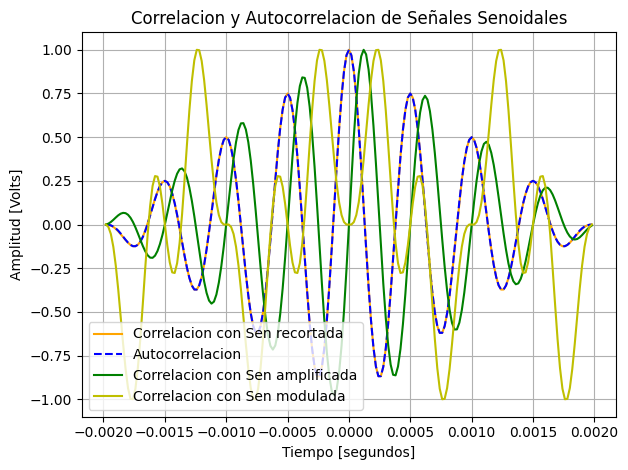

In [9]:
def correlacion( x , y ):
    if len(x) != len(y):
        raise ValueError ("Las señales deben tener el mismo largo")
    n = len(x)
    x = x.reshape(-1)
    y = y.reshape(-1)
    corr = np.correlate(x, y, mode='full') / np.max(np.correlate(x, y, mode='full'))
    k = np.arange(-n + 1 , n)
    return k, corr
    
k1, corr1 = correlacion (xx1, xx1)                ## autocorrelacion !!
k2, corr2 = correlacion (xx1, xx2)
k4, corr4 = correlacion (xx1, xx4)
k5, corr5 = correlacion (xx1, xx5)

plt.figure()
plt.title("Correlacion y Autocorrelacion de Señales Senoidales")
plt.plot(k5 * ts, corr5, label="Correlacion con Sen recortada", color='orange')
plt.plot(k1 * ts, corr1, label="Autocorrelacion", color = 'b', linestyle ='--')
plt.plot(k2 * ts, corr2, label="Correlacion con Sen amplificada", color= 'g')
plt.plot(k4 * ts, corr4, label="Correlacion con Sen modulada", color = 'y')
plt.legend(loc = 'lower left')
plt.xlabel("Tiempo [segundos]")
plt.ylabel("Amplitud [Volts]")
plt.grid(True)
plt.tight_layout()
plt.show()

El grafico de la correlacion muestra sobre el eje x, los *lags* y sobre el eje y, el grado de similitud entre las señales. Tanto la autocorrelacion y la correlacion cruzada con la senidal recortada al $75$% de su amplitud coinciden, ya que las senoidales son escencialmente las mismas. En el punto $k=0$, aparece el pico maximo, reflejo de la coincidencia total sin desfase. Las demas correlaciones, presentan picos altos donde hay mayor similitud y picos bajos donde la similitud es baja o casi nula. Otra caracteristica que se puede apreciar es la simetria, que representa señales parecidas en forma, coherente con la naturaleza senoidal de todas las funciones.

La siguiente consigna pide demostrar igualdad para la siguiente ecuacion: $2* sin ( \alpha) * sin(\beta)  = cos (\alpha - \beta) - cos(\alpha - \beta)$, defieniendo a $ \alpha =2 * \beta $ y $ \alpha = W_{\alpha} * t$, por despeje se define a las frecuencias como $ f_{\alpha} = 2 * f_{\beta}$. Se diseño el siguiente codigo, y se grafican ambos lados de la igualdad y su resta punto a punto.

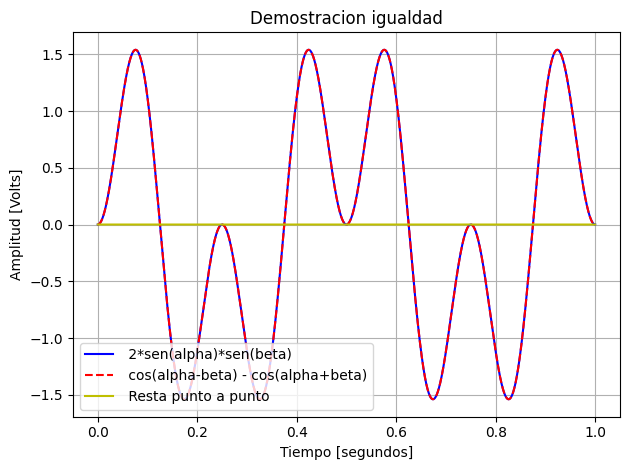

In [11]:
def func_cos(Vmax=1, dc=dc, ff=1, ph=ph, nn=N, fs=fs):
    tt = np.arange(0, nn / fs, 1 / fs).reshape(nn,1)
    xx = Vmax * np.sin(2 * np.pi * ff * tt + ph + np.pi/2).reshape(nn,1) + dc
    return tt, xx
#Defino el coseno como el seno con un desfasaje de pi/2 'impuesto', pq sen(x + pi/2) = cos(x)

## 4) 
falpha = 4 
fbeta = falpha / 2
f1 = falpha - fbeta 
f2 = falpha + fbeta 
tt4a, xx4a = func_sen(ff= falpha)
tt4b, xx4b = func_sen(ff= fbeta) 
tt4c, xx4c = func_cos(ff = f1)
tt4d, xx4d = func_cos(ff = f2)
xxizq = 2 * xx4a * xx4b
xxder = xx4c - xx4d
igualdad = xxizq - xxder 

### GRAFICO 
plt.figure()
plt.title("Demostracion igualdad")
plt.plot(tt4a, xxizq, label=" 2*sen(alpha)*sen(beta)", color = 'b')
plt.plot(tt4a, xxder, label=" cos(alpha-beta) - cos(alpha+beta)", color= 'r', linestyle = '--')
plt.plot(tt4a, igualdad, label=" Resta punto a punto ", color = 'y')
plt.legend(loc = 'lower left')
plt.xlabel("Tiempo [segundos]")
plt.ylabel("Amplitud [Volts]")
plt.grid(True)
plt.tight_layout()
plt.show()

La propiedad trigonometrica que dice $cos(\alpha - \beta) = cos(\alpha)*cos(\beta) + sen(\alpha)*sen(\beta) $, explica analiticamente lo que se pudo corroborar de manera grafica. La igualdad se cumple.

Por ultimo, se diseñaron las funciones para graficar una señal cuadrada y una señal de pulso. 

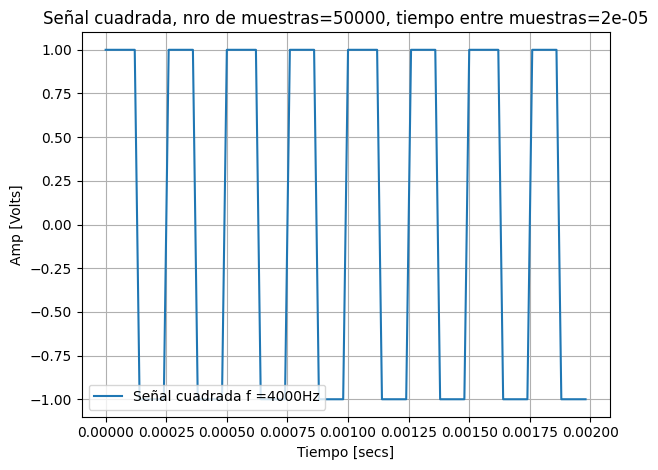

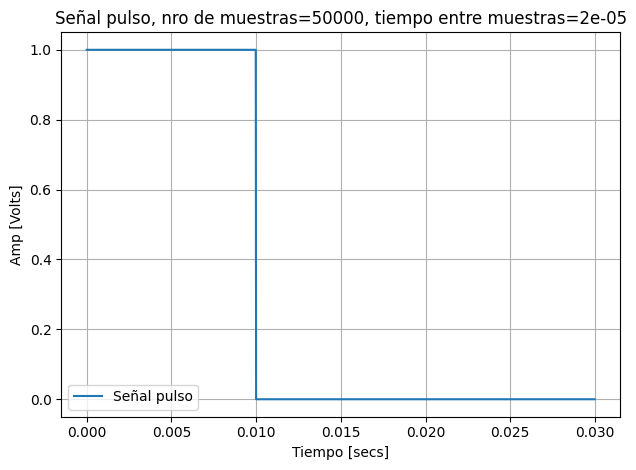

In [12]:
# Definicion funcion cuadrada
def func_square(Vmax=1, dc=dc, ph=ph, nn=N, fs=fs, ff=1, duty= 1/2):
    tta = np.arange(0, nn/fs, 1/fs).reshape(nn, 1)
    xxa = Vmax * signal.square(2 * np.pi * tta * ff + ph, duty=duty ).reshape(nn, 1) + dc
    return tta, xxa
tta1, xxa1 = func_square(ff= 4000) 

tta2 = np.arange(0, N/fs, 1/fs).reshape(N, 1)   #vector tiempo 
xxa2 = np.where(tta2 < 0.01 , 1, 0)             #del funcion pulso 

recorte2 = int(0.03 * fs )
tta1 =tta1[:recorte]
xxa1 = xxa1[:recorte]
tta2 = tta2[:recorte2]
xxa2 = xxa2[:recorte2]

plt.figure()
plt.title(f"Señal cuadrada, nro de muestras={N}, tiempo entre muestras={ts}")
plt.plot(tta1, xxa1, label="Señal cuadrada f =4000Hz")
plt.legend(loc = 'lower left')
plt.xlabel("Tiempo [secs]")
plt.ylabel("Amp [Volts]")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure()
plt.title(f"Señal pulso, nro de muestras={N}, tiempo entre muestras={ts}")
plt.plot(tta2, xxa2, label="Señal pulso")
plt.legend(loc = 'lower left')
plt.xlabel("Tiempo [secs]")
plt.ylabel("Amp [Volts]")
plt.grid(True)
plt.tight_layout()
plt.show()

A lo largo de este trabajo se abordo el analisis y procesamiento de señales desde una perspectiva integral, combinando sintesis, visualizacion, verificacion matematica y evaluacion energetica. Se generaron y graficaron distintas senales, para cada caso se calcularon parametros como el tiempo entre muestras, el numero total de muestras y la potencia o energia. Se verifico la ortogonalidad entre la senal original y las demas, lo que permitio explorar la independencia energetica entre componentes. Asimismo, se graficaron la autocorrelacion de la senal base y su correlacion cruzada con las restantes, evidenciando similitudes, desfases y relaciones estructurales entre ellas. Finalmente, se demostro la propiedad trigonometrica y se valido su cumplimiento en el contexto de senales sinusoidales. Esta ultima parte vinculo la teoria matematica con el comportamiento de las senales. En conjunto, el trabajo requirio herramientas de simulacion y analisis, y profundizar en conceptos de la teoria de señales.